# Get Product Data

## Download the raw data

In [1]:
# Download data from Citysuper
import requests
import json
import urllib.parse


def get_product(q, page):
    url = f'https://api.fastsimon.com/full_text_search?q={urllib.parse.quote(q)}&page_num={page}&UUID=a576ef0e-353e-426c-8673-dbefcd7987b4'
    response = requests.get(url)
    data = json.loads(response.text.lstrip('ispSearchResult(').rstrip(');'))
    return data['items'], data['total_p']


def get_all_products(q):
    page = 1
    products = []
    while True:
        data, total = get_product(q, page)
        products += data
        if page >= total:
            break
        page += 1
    return products


In [2]:
# using 3 main categories
candy = get_all_products('candy')
coffee = get_all_products('coffee')
noodle = get_all_products('noodle')


## Data Cleaning

In [3]:
import pandas as pd

candy_df = pd.DataFrame(candy)
coffee_df = pd.DataFrame(coffee)
noodle_df = pd.DataFrame(noodle)


In [4]:
del candy, coffee, noodle

In [5]:
candy_df.head()

,l,c,u,p,p_min,p_max,p_c,p_min_c,p_max_c,d,...,f,s,sku,p_spl,id,skus,v_c,iso,vra,vrc
0,LIFE SAVERS Hard Candy - Five Flavor (177g),HKD,/products/lifesaver-hard-candy-five-flavor-620...,30.00,,,0.00,0.00,0.00,Store in cool dry place *Photo for reference o...,...,0,4397579337771::31544713347115,6200323,0,4397579337771,"[6200323, LIFE, SAVERS, 什錦果味硬糖, , (177g)]",1,False,"[[31544713347115, [['Barcode', ['LIFE SAVERS 什...",{}
1,MORINAGA Hi-Chew Assort Candy (86g),HKD,/products/hi-chew-assort-candy-with-grapefruit...,20.00,,,0.00,0.00,0.00,From the signature candy range of the well-kno...,...,0,1515462098987::14019009413163,301115025,0,1515462098987,"[301115025, 森永, Hi-Chew, 水果軟糖, [包裝], , (86g)]",1,False,"[[14019009413163, [['Barcode', ['森永 Hi-Chew 水果...",{}
2,CANDY POPPY Popcorn - Mexican Chili Flavor (50g),HKD,/products/candy-poppy-popcorn-mexican-chili-fl...,18.00,,,24.00,24.00,24.00,Store in cool dry place *Photo for reference o...,...,0,7086410825771::40729625657387,301539080,0,7086410825771,"[301539080, CP菓糖, 爆米花, -, 鄉村墨西哥味, , (50g)]",1,False,"[[40729625657387, [['Barcode', ['CP菓糖 爆米花 - 鄉村...",{}
3,CANDY KITTENS Vegan Kittens Shaped Gummy - Swe...,HKD,/products/candy-kittens-vegan-kittens-shaped-g...,49.00,,,0.00,0.00,0.00,Store in cool dry place *Photo for reference o...,...,0,7102614011947::40767040421931,301542367,0,7102614011947,"[301542367, CANDY, KITTENS, 純素果汁貓貓軟糖, -, 紅桑子番石...",1,False,"[[40767040421931, [['Barcode', ['CANDY KITTENS...",{}
4,CANDY KITTENS Vegan Kittens Shaped Gummy - Wil...,HKD,/products/candy-kittens-vegan-kittens-shaped-g...,49.00,,,0.00,0.00,0.00,Store in cool dry place *Photo for reference o...,...,0,7102614077483::40767040487467,301542365,0,7102614077483,"[301542365, CANDY, KITTENS, 純素果汁貓貓軟糖, -, 野莓, ,...",1,False,"[[40767040487467, [['Barcode', ['CANDY KITTENS...",{}


In [6]:
candy_df.dtypes

l          object
c          object
u          object
p          object
p_min      object
p_max      object
p_c        object
p_min_c    object
p_max_c    object
d          object
t          object
t2         object
f           int64
s          object
sku        object
p_spl       int64
id         object
skus       object
v_c         int64
iso          bool
vra        object
vrc        object
dtype: object

In [7]:
candy_df.iloc[0]

l               LIFE SAVERS Hard Candy - Five Flavor  (177g)
c                                                        HKD
u          /products/lifesaver-hard-candy-five-flavor-620...
p                                                      30.00
p_min                                                       
p_max                                                       
p_c                                                     0.00
p_min_c                                                 0.00
p_max_c                                                 0.00
d          Store in cool dry place *Photo for reference o...
t          https://cdn.shopify.com/s/files/1/2597/8324/pr...
t2         https://assets.instantsearchplus.com/thumbs/cd...
f                                                          0
s                              4397579337771::31544713347115
sku                                                  6200323
p_spl                                                      0
id                      

In [8]:
# convert data type of price
def convert_dtypes(df):
    df['p'] = df['p'].astype(float)


convert_dtypes(candy_df)
convert_dtypes(coffee_df)
convert_dtypes(noodle_df)

In [9]:
# filter unnecessary data
candy_df = candy_df[~candy_df['l'].str.lower().str.contains('candle')]


In [10]:
# split into subcategories
jelly_df = candy_df[candy_df['l'].str.lower().str.contains('jelly')]
gummy_df = candy_df[candy_df['l'].str.lower().str.contains('gummy')]
tea_df = coffee_df[coffee_df['l'].str.lower().str.contains('tea')]
coffee_df = coffee_df[~coffee_df['l'].str.lower().str.contains('tea')]
udon_df = noodle_df[noodle_df['l'].str.lower().str.contains('udon')]
ramen_df = noodle_df[noodle_df['l'].str.lower().str.contains('ramen')]


## Fetch images

In [11]:
!mkdir -p images

In [13]:
import requests
import shutil

def download_image(row):
    dest = f'images/{row["sku"]}.jpg'
    url = row['t']
    print(f'downloading image for {row["l"]}')
    with requests.get(url, stream=True) as r:
        with open(dest, 'wb') as f:
            shutil.copyfileobj(r.raw, f)
    return row


In [14]:
for df in [jelly_df, gummy_df, coffee_df, tea_df, udon_df, ramen_df]:
    df.iloc[:50].apply(download_image, axis=1)


downloading image for HOEI Jelly Candy - Pure Fruits Flavour  (240g)
downloading image for OTW Pineapple Agar Jelly Candy  (8pcs)
downloading image for OTW Passion Fruit Agar Jelly Candy  (8pcs)
downloading image for OHARA Kuzukiri Jelly Noodle (Peach Flavor)  (130g)
downloading image for MARUHANICHIRO Fruitissier Fruit Jelly - Hokkaido Melon  (190g)
downloading image for ORIHIRO Konnyaku Jelly - Muscat  (120g)
downloading image for MARUMITSUSANYOU Fruits Jelly - Melon  (155g)
downloading image for MARUMITSUSANYOU Fruits Jelly - Blueberry  (155g)
downloading image for TARAMI Pure Jelly - Mixed Fruit  (270g)
downloading image for WAKASHO Chia Seed Konnyaku Jelly - Setouchi Lemon Flavor  (10pcs)
downloading image for TARAMI Melty Jelly - White Peach  (210g)
downloading image for TARAMI Melty Jelly - Mikan  (210g)
downloading image for ZAOFACTORY Yamagata White Peach Jelly  (195g)
downloading image for EXCEL Mango Konnyaku Jelly  (170g)
downloading image for TARAMI Fruit Store Jelly - Man

In [ ]:
type_to_sku = {}
for name in ['jelly', 'gummy', 'coffee', 'tea', 'udon', 'ramen']:
    skus = eval(f'{name}_df').iloc[:50]['sku']
    type_to_sku[name] = skus.to_list()


In [12]:
# load images
import numpy as np
from PIL import Image

jelly_images = [np.array(Image.open(f'images/{sku}.jpg').convert('RGB').resize((480,480))).flatten().tolist() for sku in jelly_df['sku'].tolist()[:50]]
jelly_images = np.array(jelly_images)

gummy_images = [np.array(Image.open(f'images/{sku}.jpg').convert('RGB').resize((480,480))).flatten().tolist() for sku in gummy_df['sku'].tolist()[:50]]
gummy_images = np.array(gummy_images)

coffee_images = [np.array(Image.open(f'images/{sku}.jpg').convert('RGB').resize((480,480))).flatten().tolist() for sku in coffee_df['sku'].tolist()[:50]]
coffee_images = np.array(coffee_images)

tea_images = [np.array(Image.open(f'images/{sku}.jpg').convert('RGB').resize((480,480))).flatten().tolist() for sku in tea_df['sku'].tolist()[:50]]
tea_images = np.array(tea_images)

udon_images = [np.array(Image.open(f'images/{sku}.jpg').convert('RGB').resize((480,480))).flatten().tolist() for sku in udon_df['sku'].tolist()[:50]]
udon_images = np.array(udon_images)

ramen_images = [np.array(Image.open(f'images/{sku}.jpg').convert('RGB').resize((480,480))).flatten().tolist() for sku in ramen_df['sku'].tolist()[:50]]
ramen_images = np.array(ramen_images)


FileNotFoundError: [Errno 2] No such file or directory: 'images/301495226.jpg'

In [42]:
# load images 2
import json
import numpy as np
from PIL import Image


with open('images/type_to_sku.json') as f:
    type_to_sku = json.loads(f.read())


labelmap = list(type_to_sku)
images = []
labels = []
for i, (name, sku_ls) in enumerate(type_to_sku.items()):
    labels.append(np.ones_like(sku_ls, int) * i)
    images += [np.array(Image.open(f'images/{sku}.jpg').convert('RGB').resize((480,480))).flatten().tolist()
               for sku in sku_ls]

labels = np.concatenate(labels)
images = np.array(images)

print(labels)


/home/anthony/miniconda3/envs/ai/lib/python3.11/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5]


## Prepare labels and data

In [2]:
labelmap = ['jelly', 'gummy', 'coffee', 'tea', 'udon', 'ramen']

labels = np.concatenate((np.zeros(50), np.ones(50), np.ones(50)*2, np.ones(50)*3, np.ones(50)*4, np.ones(50)*5))
images = np.concatenate((jelly_images, gummy_images, coffee_images, tea_images, udon_images, ramen_images))


NameError: name 'jelly_images' is not defined

In [6]:
labels.shape

(299,)

In [7]:
images.shape

(299, 691200)

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, shuffle=True)


# Train Image Classification Model

## 1. SVC

First, we try SVC to classify those images directly.

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

clf = SVC().fit(X_train, y_train)
prediction = clf.predict(X_test)

f1_score(y_test, prediction, average='micro')

0.6

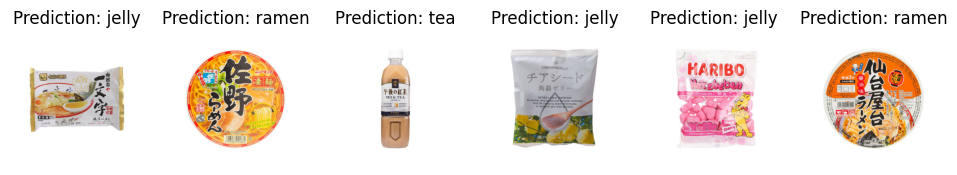

In [8]:
import matplotlib.pyplot as plt

_, axes = plt.subplots(nrows=1, ncols=6, figsize=(12, 3))
for ax, image, pred in zip(axes, X_test, prediction):
    ax.set_axis_off()
    ax.imshow(image.reshape(480, 480, 3))
    ax.set_title(f"Prediction: {labelmap[int(pred)]}")


This model doesn't perform well, the reasons may be:
1. the SVC model is very simple
2. the data contain many unnecessary information (many blank pixels)
3. the data set is very small (total 300 samples)

## 2. Dimensionality Reduction

PCA can filter out unnecessary information. Let's try some other models for new data.

In [9]:
# Dimensionality Reduction
from sklearn.decomposition import PCA

pca = PCA(0.9).fit(images)

In [10]:
X_train_pca = (pca.transform(X_train) / 255) - 0.5
X_test_pca = (pca.transform(X_test) / 255) - 0.5

X_train_pca.shape

(239, 136)

### i. SVC

In [11]:
clf_pca = SVC().fit(X_train_pca, y_train)
prediction = clf_pca.predict(X_test_pca)

f1_score(y_test, prediction, average='micro')


0.6166666666666667

### ii. MLP

In [12]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier([12, 12, 12], alpha=0.3, random_state=42, batch_size=20, max_iter=1000).fit(X_train_pca, y_train)
prediction = mlp.predict(X_test_pca)

f1_score(y_test, prediction, average='micro')


0.5166666666666667

### iii. Bayesian Classifier

In [13]:
from sklearn.naive_bayes import BernoulliNB

bayes = BernoulliNB().fit(X_train_pca, y_train)
prediction = bayes.predict(X_test_pca)

f1_score(y_test, prediction, average='micro')


0.31666666666666665

### iv. Logistics Regression

In [14]:
from sklearn.linear_model import LogisticRegression

lrg = LogisticRegression(random_state=42, max_iter=500).fit(X_train_pca, y_train)
prediction = lrg.predict(X_test_pca)

f1_score(y_test, prediction, average='micro')


/home/anthony/miniconda3/envs/ai/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5166666666666667

### v. Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42).fit(X_train_pca, y_train)
prediction = rfc.predict(X_test_pca)

f1_score(y_test, prediction, average='micro')


0.48333333333333334

The models can perform better after dimensionality reduction, but the f1 score still very low.

## 3. Finetuned CNN

Since the dataset is very small, we need to use a pre-train model to improve the accuracy.

In [1]:
import torch
import torchvision
from torchvision import models, transforms

### Design the Model

In [59]:
model = models.alexnet(pretrained=True)

for param in model.parameters():
    param.requires_grad = False


/home/anthony/miniconda3/envs/ai/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/anthony/miniconda3/envs/ai/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [61]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [63]:
model.classifier[4].weight.requires_grad = True

output_dim = model.classifier[6].in_features
model.classifier[6] = torch.nn.Linear(output_dim, 6)

### Load Data

In [64]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
    ])

In [65]:
# load images
import json
import numpy as np
from PIL import Image


with open('images/type_to_sku.json') as f:
    type_to_sku = json.loads(f.read())


labelmap = list(type_to_sku)
images_original = []
images = []
labels = []
for i, (name, sku_ls) in enumerate(type_to_sku.items()):
    labels.append((np.ones_like(sku_ls, int) * i).astype(int))
    images_original += [np.array(Image.open(f'images/{sku}.jpg').convert('RGB').resize((480,480))) for sku in sku_ls]
    images += [transform(Image.open(f'images/{sku}.jpg').convert('RGB').resize((480,480))) for sku in sku_ls]


/home/anthony/miniconda3/envs/ai/lib/python3.11/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [66]:
images = torch.concatenate((images)).reshape(-1, 3, 256, 256)
images.shape

torch.Size([299, 3, 256, 256])

In [67]:
# labels = torch.Tensor(np.concatenate(labels)).int()
labels = np.concatenate(labels)
labels_original = labels
labels.shape

(299,)

In [68]:
train_set, val_set, test_set = torch.utils.data.random_split(list(zip(images, labels.tolist())), [200, 66, 33])

In [69]:
from torch.utils.data import DataLoader


train_loader =  DataLoader(train_set, batch_size=20)
validation_loader =  DataLoader(val_set, batch_size=11)
test_loader = DataLoader(test_set, batch_size=11)

### Optimizer and Loss

In [70]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Device in use:', str(device))

Device in use: cuda:0


In [71]:
model = model.to(device)

params_to_update = []
for name, param in model.named_parameters():
    if param.requires_grad:
        params_to_update.append(param)

params_to_update

[Parameter containing:
 tensor([[-0.0107, -0.0015,  0.0057,  ...,  0.0026, -0.0010, -0.0087],
         [-0.0279,  0.0168, -0.0162,  ..., -0.0079, -0.0049, -0.0219],
         [-0.0112, -0.0184,  0.0073,  ...,  0.0013,  0.0050,  0.0055],
         ...,
         [-0.0027, -0.0146,  0.0057,  ...,  0.0250, -0.0042, -0.0009],
         [ 0.0066,  0.0094,  0.0232,  ...,  0.0060, -0.0029, -0.0042],
         [ 0.0118,  0.0041,  0.0013,  ..., -0.0088, -0.0039,  0.0055]],
        device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([[-0.0145,  0.0148, -0.0082,  ..., -0.0004, -0.0098,  0.0059],
         [ 0.0097, -0.0125, -0.0059,  ..., -0.0148, -0.0062, -0.0043],
         [-0.0049, -0.0005, -0.0154,  ...,  0.0067, -0.0125,  0.0040],
         [ 0.0140,  0.0087, -0.0097,  ..., -0.0142, -0.0013,  0.0144],
         [-0.0031,  0.0040,  0.0089,  ...,  0.0106,  0.0037,  0.0127],
         [ 0.0153,  0.0110,  0.0044,  ...,  0.0112, -0.0001,  0.0065]],
        device='cuda:0', requires_grad=T

In [72]:
from torch.optim import Adam
optimizer = Adam(params_to_update, lr=0.0001)

In [73]:
criterion = torch.nn.CrossEntropyLoss()

### Train the Model

In [77]:
import time
from copy import deepcopy


num_epochs = 20

since = time.time()

# record the historical and the best accuracy.
val_acc_history = []
best_acc = 0.0
best_model_wts = deepcopy(model.state_dict())

for epoch in range(num_epochs):
    tic = time.time()
    print('Epoch {}/{}'.format(epoch+1, num_epochs))
    print('-' * 15)

    # phase one: training.
    model.train() # set the model to training mode
    running_loss = 0
    running_corrects = 0

    # iterate over training subset
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # set the parameter gradients to zero
        optimizer.zero_grad()

        # forward pass: get prediction and compute loss
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # backward pass: compute gradients
        loss.backward()

        # update parameters
        optimizer.step()

        # get the predicted class indices
        _, preds = torch.max(outputs, 1)

        # statistics
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    # The training phase in this epoch is done. Compute the statistics.
    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = running_corrects.double() / len(train_loader.dataset)
    print('Training Loss: {:.4f} Acc: {:.4f}'.format(epoch_loss, epoch_acc))

    # phase two: validation.
    model.eval()   # set the model to evaluation mode
    running_loss = 0.0
    running_corrects = 0

    # computing gradient is not necessary in the validation phase.
    with torch.no_grad():
        for inputs, labels in validation_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # get prediction and compute loss
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # get the predicted class indices
            _, preds = torch.max(outputs, 1)

            # statistics
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

    # The evaluation phase in this epoch is done. Compute the statistics.
    epoch_loss = running_loss / len(validation_loader.dataset)
    epoch_acc = running_corrects.double() / len(validation_loader.dataset)
    print('Validation Loss: {:.4f} Acc: {:.4f}'.format(epoch_loss, epoch_acc))

    # check if the performance improves, copy the model if yes.
    if epoch_acc > best_acc:
        best_acc = epoch_acc
        best_model_wts = deepcopy(model.state_dict())
    val_acc_history.append(epoch_acc)
    print('Time: {:.1f}s'.format(time.time()-tic))
    print('='*15)
    print()

time_elapsed = time.time() - since
print('Finetuning complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
print('Best validation Acc: {:4f}'.format(best_acc))

# load the best model weights
model.load_state_dict(best_model_wts)

Epoch 1/20
---------------
Training Loss: 0.1910 Acc: 0.9750
Validation Loss: 0.7141 Acc: 0.7879
Time: 0.2s

Epoch 2/20
---------------
Training Loss: 0.1239 Acc: 0.9850
Validation Loss: 0.7144 Acc: 0.7879
Time: 0.2s

Epoch 3/20
---------------
Training Loss: 0.1159 Acc: 0.9900
Validation Loss: 0.6855 Acc: 0.8030
Time: 0.2s

Epoch 4/20
---------------
Training Loss: 0.0866 Acc: 1.0000
Validation Loss: 0.6998 Acc: 0.7879
Time: 0.2s

Epoch 5/20
---------------
Training Loss: 0.0632 Acc: 0.9950
Validation Loss: 0.7262 Acc: 0.7576
Time: 0.2s

Epoch 6/20
---------------
Training Loss: 0.0569 Acc: 1.0000
Validation Loss: 0.7372 Acc: 0.7576
Time: 0.2s

Epoch 7/20
---------------
Training Loss: 0.0473 Acc: 0.9950
Validation Loss: 0.7490 Acc: 0.7727
Time: 0.2s

Epoch 8/20
---------------
Training Loss: 0.0352 Acc: 1.0000
Validation Loss: 0.7361 Acc: 0.7576
Time: 0.2s

Epoch 9/20
---------------
Training Loss: 0.0279 Acc: 1.0000
Validation Loss: 0.7387 Acc: 0.7576
Time: 0.2s

Epoch 10/20
-------

<All keys matched successfully>

### Test the Model

In [78]:
# test the model
model.eval()   # set the model to evaluation mode
running_loss = 0.0
running_corrects = 0

# computing gradient is not necessary in the validation phase.
prediction = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # get prediction and compute loss
        outputs = model(inputs)
        prediction += outputs.argmax(1).tolist()

        loss = criterion(outputs, labels)

        # get the predicted class indices
        _, preds = torch.max(outputs, 1)

        # statistics
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

# The evaluation phase in this epoch is done. Compute the statistics.
epoch_loss = running_loss / len(test_loader.dataset)
epoch_acc = running_corrects.double() / len(test_loader.dataset)
print('Test Loss: {:.4f} Acc: {:.4f}'.format(epoch_loss, epoch_acc))


Test Loss: 0.5047 Acc: 0.7879


In [79]:
from sklearn.metrics import f1_score


f1_score(labels_original[test_set.indices], prediction, average='micro')

0.7878787878787878

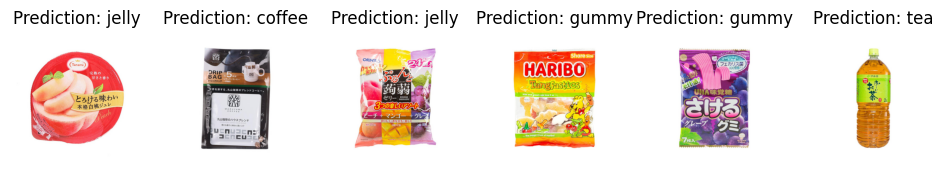

In [80]:
import matplotlib.pyplot as plt


_, axes = plt.subplots(nrows=1, ncols=6, figsize=(12, 3))
for ax, image, pred in zip(axes, np.array(images_original)[test_set.indices]parameters, prediction):
    ax.set_axis_off()
    ax.imshow(image.reshape(480, 480, 3))
    ax.set_title(f"Prediction: {labelmap[int(pred)]}")


# Conclusion
For this small dataset, the best way is transfer learning. A well-performed model can catch the features of a small dataset easily.